In [53]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn

In [16]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

#Assign column names to dataset
names = ['sepal_length','sepal_width','petal_length','petal_width','class']

#Read dataset to pandas dataframe
dataset = pd.read_csv(url, names=names)

In [17]:
dataset.head()

sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [18]:
dataset.shape

(150, 5)

In [19]:
dataset.describe()

sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

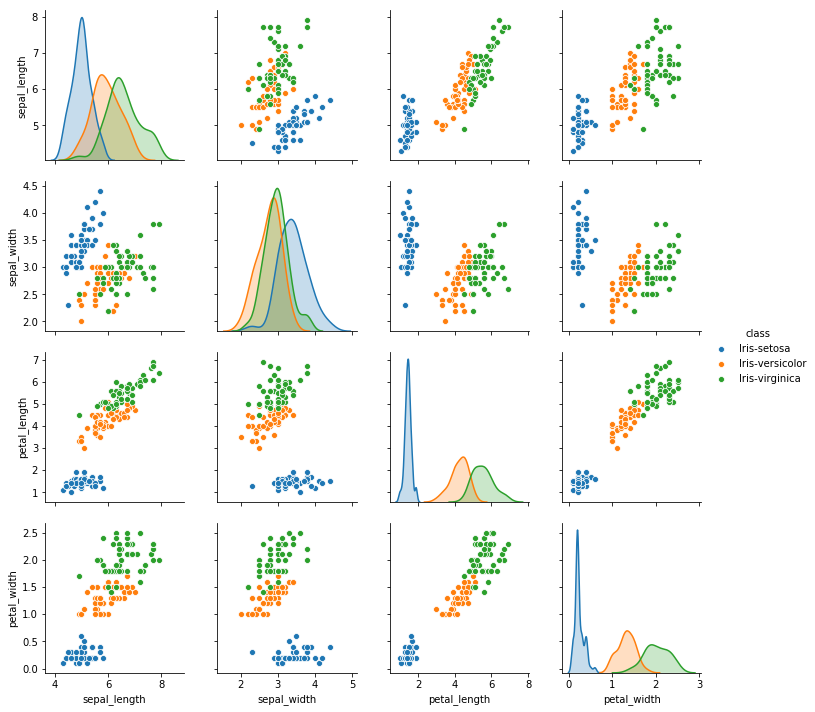

In [20]:
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(data=dataset, hue = 'class')

In [51]:
X = dataset.drop(['class'], axis=1).values
y = dataset['class']


In [54]:
#label encoding
le = LabelEncoder()
y = le.fit_transform(y)
print(X[0:5])
print(y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [56]:
# Splitting the dataset into train and test 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)
print("Training set- ", X_train.shape)
print("Testing set- ", X_test.shape)

Training set-  (105, 4)
Testing set-  (45, 4)


In [57]:
#defining random forest classifier 

clfr = RandomForestClassifier(random_state = 100)

# Performing training 

clfr.fit(X_train, y_train)

RandomForestClassifier(random_state=100)

In [58]:
#making prediction 

y_pred=clfr.predict(X_test)

y_pred

array([2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 1, 1, 2, 2, 2, 2, 0,
       2, 0, 1, 2, 1, 0, 1, 2, 1, 1, 1, 0, 0, 1, 0, 1, 2, 2, 0, 1, 2, 2,
       0])

In [59]:
#Accuray of the model 
from sklearn.metrics import confusion_matrix
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
cm

Accuracy: 0.9555555555555556


array([[16,  0,  0],
       [ 0, 10,  1],
       [ 0,  1, 17]])

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn

In [4]:
data = pd.read_csv("C:\\Users\\GowriPrasanthRamsamy\\prashanth\\RF\\diabetes.csv")
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [13]:
x=data.iloc[:,:8].astype(int)
print(x)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
0              6      148             72             35        0   33   
1              1       85             66             29        0   26   
2              8      183             64              0        0   23   
3              1       89             66             23       94   28   
4              0      137             40             35      168   43   
..           ...      ...            ...            ...      ...  ...   
763           10      101             76             48      180   32   
764            2      122             70             27        0   36   
765            5      121             72             23      112   26   
766            1      126             60              0        0   30   
767            1       93             70             31        0   30   

     DiabetesPedigreeFunction  Age  
0                           0   50  
1                           0   31  
2           

In [15]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [16]:
#dropping off our decided class from features
cols=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
x=data[cols]
x = data.drop(['Pregnancies','Outcome'], axis=1).values
y = data['Pregnancies']


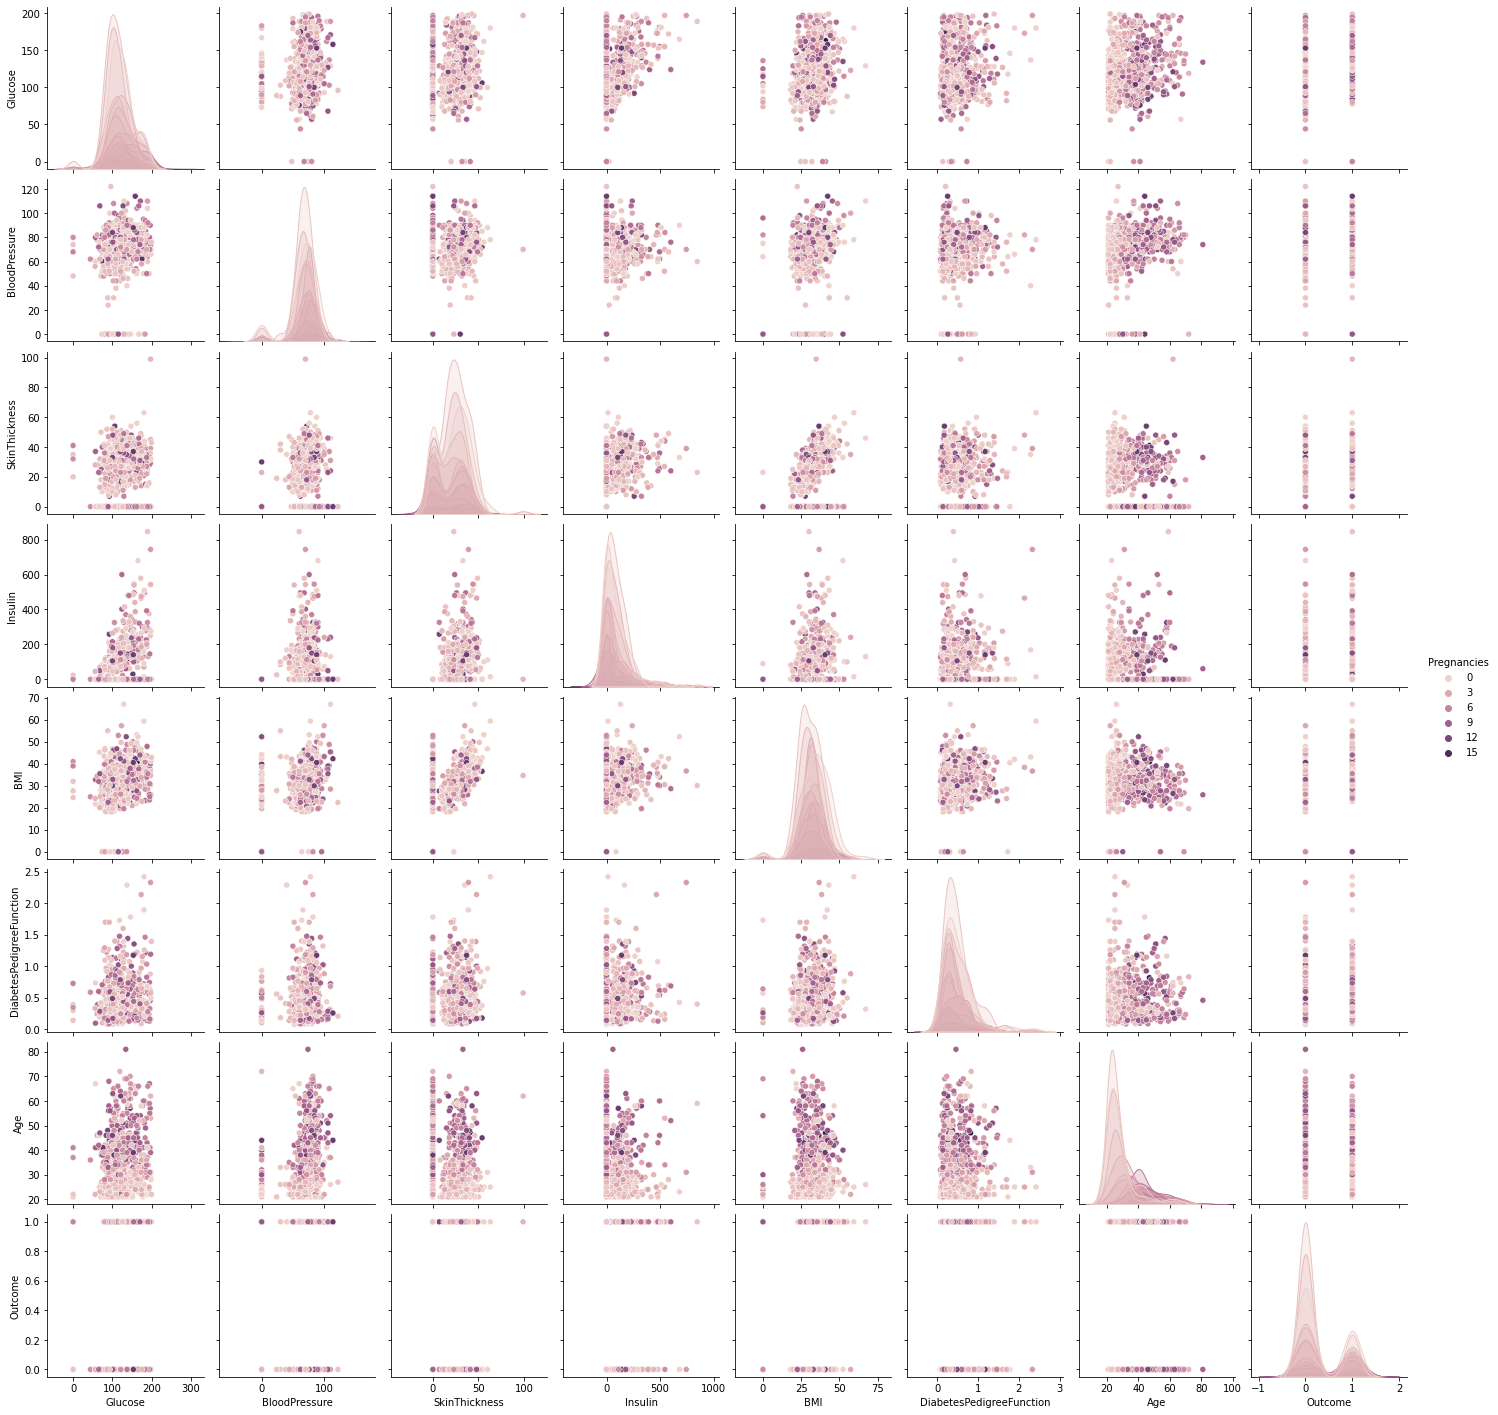

In [34]:
sns.pairplot(data=data, hue = 'Pregnancies')

In [35]:
#predicting Type using our model so dropping it off from x and add it to y.
#checking out the values of x and y
print(x)
print(y)

[[148.     72.     35.    ...  33.6     0.627  50.   ]
 [ 85.     66.     29.    ...  26.6     0.351  31.   ]
 [183.     64.      0.    ...  23.3     0.672  32.   ]
 ...
 [121.     72.     23.    ...  26.2     0.245  30.   ]
 [126.     60.      0.    ...  30.1     0.349  47.   ]
 [ 93.     70.     31.    ...  30.4     0.315  23.   ]]
0       6
1       1
2       8
3       1
4       0
       ..
763    10
764     2
765     5
766     1
767     1
Name: Pregnancies, Length: 768, dtype: int64


In [36]:
x_train,x_test, y_train,y_test=train_test_split(x,y,test_size=0.5)
regressor = RandomForestRegressor(n_estimators=10)
regressor=regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test).astype(int)
print(y_test)
print(y_pred)
print("accuracy:",metrics.accuracy_score(y_test,y_pred))

391    5
49     7
681    0
69     4
742    1
      ..
589    0
2      8
651    1
123    5
172    2
Name: Pregnancies, Length: 384, dtype: int64
[ 1  2  0  2  1  1  2  4  6  5  2  5  5  3  6  2  0  3  5  3  5  2  0  2
  5  6  1  1  0  4  1  6  1  1  7  7  2  1  3  6  0  5  1  2  1  1  2  1
  5  4  2  7  4  2  3  1  1  2  8  1  1  2  6  1  3 10  9  6  8  3  6  7
  1  4  0  2  5  7  1  6  1  3  6  4  2  8  7  2  4  3 11  1  3  3  2  6
  4  3  2  0  2  1  4  3  0  4  1  0  2  4  5  1  7  6  3  1  8  4  5  7
  7  2  1  3  4  1  2  8  0  0  1  4  2  6  8  8  5  6  1  6  5  8  5  2
  2  6  2  1  4  2  1  2  6  2  1  0  8  6  8  6  1  1  1  6  8  7  9  4
  2  4  7  5  4  5  1  2  1  4  4  3  4  8  1  2  3  6  6  3  5  1  6  9
  0  6  0  2  5  2  1  2  1  1  2  2  6  0  8  0  8  8  1  3  6  7  5  0
  1  6  4  5  2  7  2  3  2  0  3  5  1  1  5  2  3  6  6  8  8  4  8  4
  7  4  4  1  2  5  0  8  9  4  2  1  1  8  0  7  7  1  7  1  1  7  0  5
  2  8  2  6  2  1  5  1  4  8  1  6  0  2  2 11  1  

In [ ]:
#ACCURACY IS TOO LOW BECAUSE OF DATASETS AND PREPROCESSING IS NOT DONE
#JUST TRIED TO SEE HOW PRE-PROCESSING AND CLEANING WOULD EFFECT THE ACCURACY
#OF THE SCORE. THE MODEL IS PERFORMING SO BAD AND PRE-PROCESSING IS VERY IMPORTANT 
#FOR HAVING ACCURATE RESULTS. 

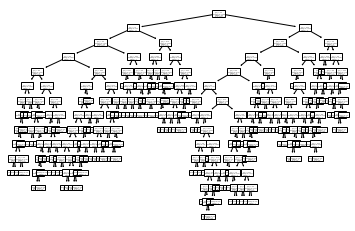

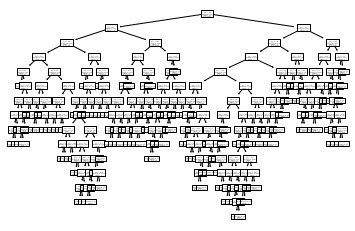

In [37]:
#VISUALISNG AS TREE FOR 2 SCENARIOS OF ESTIMATORS
from matplotlib import pyplot as plt
from sklearn import tree
fig = plt.figure()
tree.plot_tree(regressor.estimators_[5])
plt.show()
tree.plot_tree(regressor.estimators_[0])
plt.show()